<a href="https://colab.research.google.com/github/roydendsouza31/AI-Generated-Images-vs-Real-Images/blob/R4/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distinguishing AI-generated images from real images

Creating the datasets

In [6]:
! cp /content/drive/MyDrive/dataset_train.zip ./

In [7]:
! cp /content/drive/MyDrive/dataset_test.zip ./

In [26]:
import zipfile

file_path = '/content/dataset_train.zip'

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset_train')

In [27]:

file_path = '/content/dataset_test.zip'

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset_test')

In [13]:
#Testing dataset - reduced by 90%
import os
import random
import shutil

aigenerated_folder = "/content/dataset_test/AIGenerated"
real_folder = "/content/dataset_test/Real"

# Function to get the number of images in a folder
def count_images(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Function to delete % of the images in a folder
def reduce_folder_size(folder_path):
    num_images_before = count_images(folder_path)
    num_images_to_delete = int(num_images_before * 0.9)
    all_images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    images_to_delete = random.sample(all_images, num_images_to_delete)
    for image in images_to_delete:
        os.remove(os.path.join(folder_path, image))
    num_images_after = count_images(folder_path)
    print(f"Deleted {num_images_to_delete} images from {folder_path}")
    print(f"Number of images in {folder_path} before: {num_images_before}, after: {num_images_after}")

# Print the number of images in each folder before reducing the size
print(f"Number of images in {aigenerated_folder}: {count_images(aigenerated_folder)}")
print(f"Number of images in {real_folder}: {count_images(real_folder)}")

# Reduce the size of the AiGenerated and Real folders
reduce_folder_size(aigenerated_folder)
reduce_folder_size(real_folder)

Number of images in /content/dataset_test/AIGenerated: 1000
Number of images in /content/dataset_test/Real: 1000
Deleted 900 images from /content/dataset_test/AIGenerated
Number of images in /content/dataset_test/AIGenerated before: 1000, after: 100
Deleted 900 images from /content/dataset_test/Real
Number of images in /content/dataset_test/Real before: 1000, after: 100


In [8]:
data = "/content/dataset_train"
categories = ['Real', 'AIGenerated']

In [2]:
#Replacing the spaces in file names with _
import os

aigenerated_folder = "/content/dataset_train/AIGenerated"
for filename in os.listdir(aigenerated_folder):
    if ' ' in filename:
        os.rename(os.path.join(aigenerated_folder, filename), os.path.join(aigenerated_folder, filename.replace(' ', '_')))


In [3]:
import os

real_folder = "/content/dataset_train/Real"
for filename in os.listdir(real_folder):
    if ' ' in filename:
        os.rename(os.path.join(real_folder, filename), os.path.join(real_folder, filename.replace(' ', '_')))


In [4]:
img_size = 48
training_data = []

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv

import random
import PIL
import pickle

In [9]:
#Resizing the images and Normalizing pixel values
for category in categories:
    path = os.path.join(data, category)
    classes = categories.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = cv.imread(img_path)
        if img_array is not None:
            img_resized = cv.resize(img_array, (img_size, img_size))
            img_resized = img_resized / 255.0  # Normalize pixel values to [0, 1]
            training_data.append([img_resized, classes])
        else:
            print(f"Failed to load image: \"{img_path}\"")

print(f"Total images processed: {len(training_data)}")

Failed to load image: "/content/dataset_train/Real/cityscapes_92.jpg"
Failed to load image: "/content/dataset_train/Real/traffic_25.jpg"
Failed to load image: "/content/dataset_train/Real/vehicles_65.jpg"
Failed to load image: "/content/dataset_train/Real/cityscapes_16.jpg"
Failed to load image: "/content/dataset_train/Real/vehicles_24.jpg"
Failed to load image: "/content/dataset_train/Real/cityscapes_67.jpg"
Failed to load image: "/content/dataset_train/Real/animals_84.jpg"
Failed to load image: "/content/dataset_train/Real/offices_21.jpg"
Failed to load image: "/content/dataset_train/Real/cityscapes_84.jpg"
Failed to load image: "/content/dataset_train/Real/traffic_16.jpg"
Failed to load image: "/content/dataset_train/Real/cityscapes_86.jpg"
Failed to load image: "/content/dataset_train/Real/cityscapes_38.jpg"
Failed to load image: "/content/dataset_train/Real/traffic_40.jpg"
Failed to load image: "/content/dataset_train/Real/traffic_23.jpg"
Failed to load image: "/content/dataset_tr

In [10]:
len(training_data), training_data[0][0].shape

(30802, (48, 48, 3))

In [11]:
random.shuffle(training_data)

In [12]:
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

In [13]:
X_train.shape
y_train.shape

(30802,)

In [39]:
X_train[0].shape

(48, 48, 3)

In [40]:
pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out, protocol=4)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out, protocol=4)
pickle_out.close()

In [41]:
pickle_in = open("X_train.pickle", "rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle", "rb")
y_train = pickle.load(pickle_in)

In [42]:
X_train.shape
y_train.shape

(61604,)

In [43]:
data = "/content/dataset_test/"
categories = ['Real', 'AIGenerated']

img_size = 48
testing_data = []

i = 0
for category in categories:
    path = os.path.join(data,category)
    classes = categories.index(category)
    for img in os.listdir(path):
        i = i + 1
        img_array = cv.imread(os.path.join(path,img))
        new_array = cv.resize(img_array, (48,48))
        new_array = new_array/255
        testing_data.append([new_array, classes])

random.shuffle(testing_data)

X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [44]:
X_test.shape
y_test.shape

(2000,)

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential

In [46]:
#Setting the parameters for the model
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (48,48,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 64)        0

In [1]:
#Training the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

NameError: name 'model' is not defined

In [ ]:
#Saving the model
model.save("AIGeneratedModel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Loading the saved model
model_new = keras.models.load_model("AIGeneratedModel.h5")

In [ ]:
model_new.evaluate(X_test, y_test)
y_pred = model_new.predict(X_test)
y_pred.shape

63/63 [==============================] - 0s 3ms/step - loss: 0.2617 - accuracy: 0.8920


[0.26167628169059753, 0.8920000195503235]

In [ ]:
y_predicted = []

for arr in y_pred:
    if arr[0] <= 0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

y_predicted = np.array(y_predicted)

In [ ]:
y_predicted.shape

(2000,)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1000
           1       0.96      0.81      0.88      1000

    accuracy                           0.89      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.90      0.89      0.89      2000



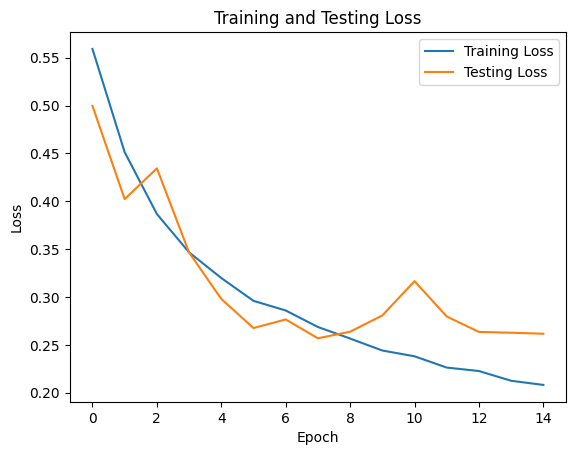

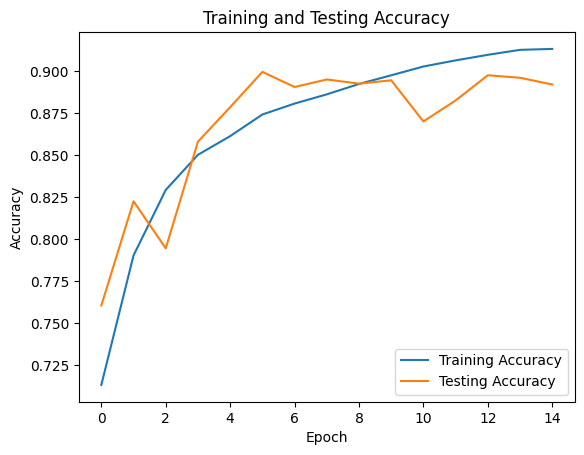

In [ ]:

# Plot the training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# Plot the training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

# Testing

In [ ]:
def find_out(path_img):
    img_arr = cv.imread(path_img)
    plt.imshow(img_arr)
    new_arr = cv.resize(img_arr, (48,48))
    new_arr = new_arr/255
    test = []
    test.append(new_arr)
    test = np.array(test).reshape(-1, img_size, img_size, 3)
    y = model_new.predict(test)
    if y[0] <= 0.5:
        print("The given image is Real.")
    else:
        print("The given image is AI Generated.")

1/1 [==============================] - 0s 17ms/step
The given image is AI Generated.


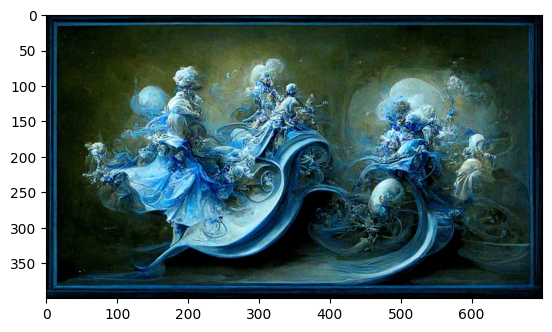

In [ ]:
path_img = '/content/testing/ai1.webp'
find_out(path_img)

1/1 [==============================] - 0s 18ms/step
The given image is AI Generated.


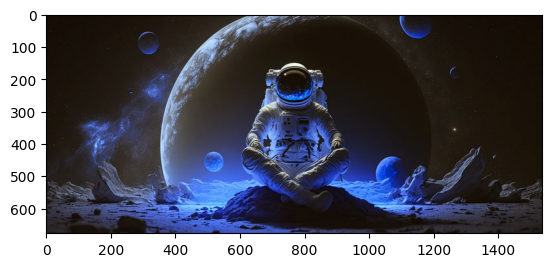

In [ ]:
path_img = '/content/testing/ai2.webp'
find_out(path_img)

1/1 [==============================] - 0s 30ms/step
The given image is AI Generated.


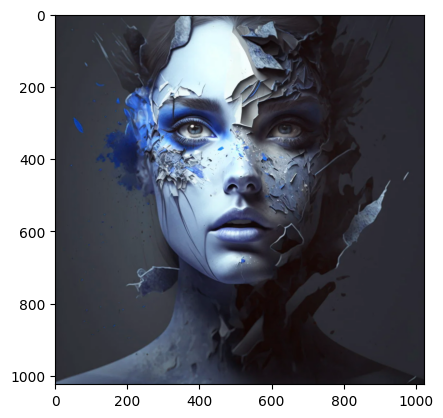

In [ ]:
path_img = '/content/testing/ai3.webp'
find_out(path_img)

1/1 [==============================] - 0s 31ms/step
The given image is Real.


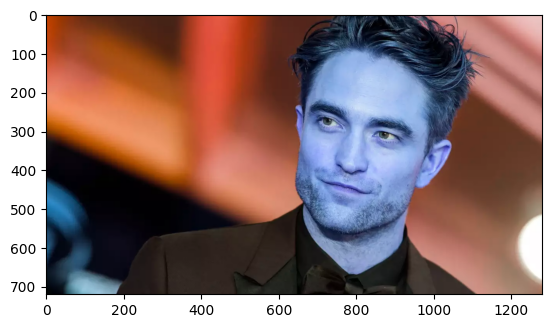

In [ ]:
path_img = '/content/testing/real1.webp'
find_out(path_img)

1/1 [==============================] - 0s 17ms/step
The given image is Real.


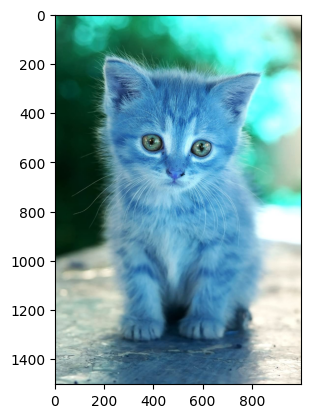

In [ ]:
path_img = '/content/testing/real2.jpeg'
find_out(path_img)

1/1 [==============================] - 0s 18ms/step
The given image is Real.


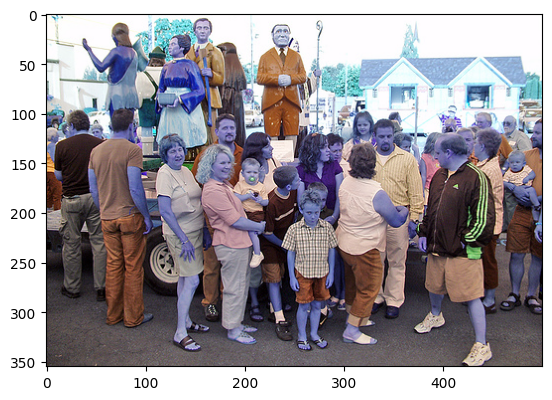

In [ ]:
path_img = '/content/testing/real3.jpg'
find_out(path_img)

In [ ]:
import shutil
shutil.make_archive('testing', 'zip', '/content/testing')

'/content/testing.zip'